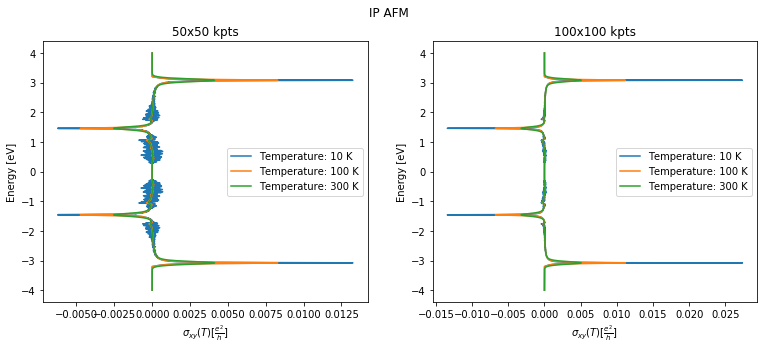

In [5]:
key = 'anticol_theta'
rotation = 'scancol'
rotation2 = 'scancolflip'
seedfname = "path_rel_G-K-Kprime_test_kpts"
seedfnamesq = 'sq_fill_anticol'
save_str = seedfname + '_' + key + '_' + rotation
prefix = "/Users/kipp/STB/output/"
prefix_stb = "/Users/kipp/STB/"
prefix_inis = "/Users/kipp/STB/inis/"
save_prefix = "/output/" + seedfname
magtype = 'anticol'
label = ["$\Gamma$", "$K^{'}$", "K", "$\Gamma$"]
plotlables = ['50x50 kpts','100x100 kpts']
#fname = seedfname + '_' + key + '_' + rotation
fname = seedfname
k = 20
key = 'temperature'
kppd = np.zeros(2,dtype = int)
pattern = key + "\s*=\s*['a-z]+|" + key + "\s*=\s*(\d+(.\d*)+(.\d*)E\+\d\d)|" + key + "\s*=\s*"

fig,ax = plt.subplots(nrows=1,ncols = 2,figsize = (2*6.4,4.8))
fig.suptitle('IP AFM')

for numax,axes in enumerate(ax):
    axes.set_title(plotlables[numax])
    axes.set_xlabel(r'$\sigma_{xy} (T) [\frac{e^2}{h}]$')
    axes.set_ylabel('Energy [eV]')
    axes.xaxis.set_major_formatter(plt.ScalarFormatter(useOffset = True))
    axes.xaxis.get_major_formatter().set_scientific(True)
    axes.xaxis.get_major_formatter().set_powerlimits(lims = (-3,4))

    for l in range(3):
    #print(prefix + fname + '_{:02}/'.format(j) + 'hall_cond_iter={:05}.npy'.format(j))
        loadstr = prefix + fname + '_{0}{1}/hall_cond.npy'.format(l,numax) 
        Eloadstr = prefix + fname + '_{0}{1}/hall_cond_E.npy'.format(l,numax) 
        hc = np.load(loadstr)
        hc_E = np.load(Eloadstr)
        count = 0
        with open(prefix + fname + '_{0}{1}'.format(l,numax)  + 'setup.cfg','r+') as fin:
            for num,line in enumerate(fin,1):
                s = re.search(pattern,line)
                if s!=None:
                    if s.group(2)!=None:
                        kppd[count] = float(s.group(1))
                        count +=1
        axes.plot(hc,hc_E,label = 'Temperature: {} K'.format(kppd[0]))
    axes.legend()
#with PdfPages("/Users/kipp/STB/weyl_figures/Weyl_figures/" + 'ip_afm_Convergence_Behaviour_Temperature') as pdf:
#    pdf.savefig(fig)


In [2]:
prefix + fname + '_{0}{1}/hall_cond.npy'.format(0,1) 

NameError: name 'prefix' is not defined

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.backends.backend_pdf import PdfPages

In [39]:
print(s.group(1)[0])

0


In [7]:
numax = 0
l = 1
bandloadstr = prefix + fname + '_{0}{1}/band_E.npy'.format(l,numax)
loadstr = prefix + fname + '_{0}{1}/DOS_up.npy'.format(l,numax) 
loadstr2 = prefix + fname + '_{0}{1}/DOS_down.npy'.format(l,numax) 
Eloadstr = prefix + fname + '_{0}{1}/DOS_E.npy'.format(l,numax) 
DOS_up = np.load(loadstr)
DOS_down = np.load(loadstr2)
DOS_E = np.load(Eloadstr)
E = np.load(bandloadstr)
k = np.arange(0,E.shape[1])

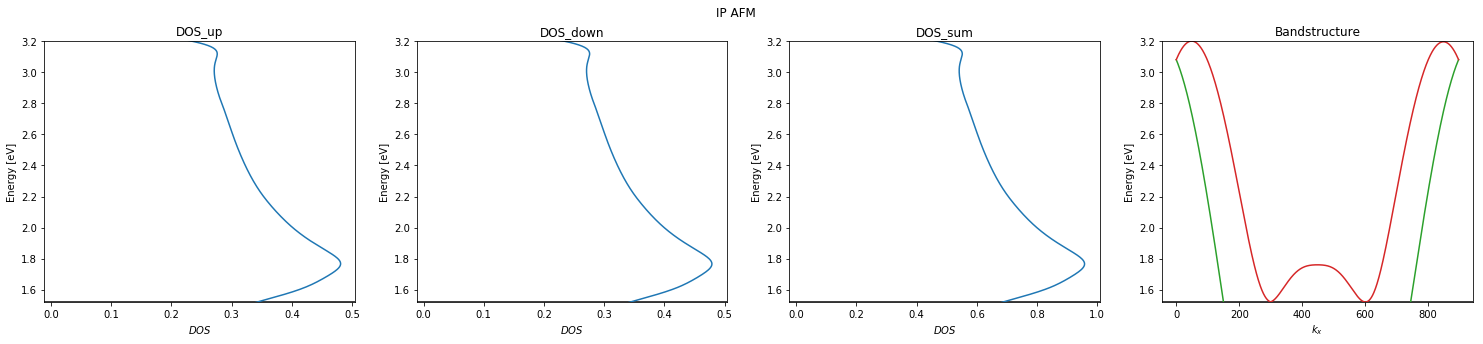

In [37]:
fig,ax = plt.subplots(nrows=1,ncols = 4,figsize = (4*6.4,4.8))
fig.suptitle('IP AFM')
plotlables = ['DOS_up','DOS_down','DOS_sum','Bandstructure']
for numax,axes in enumerate(ax):
    axes.set_title(plotlables[numax])
    if numax<3:
        axes.set_xlabel(r'$DOS$')
    else:
        axes.set_xlabel(r'$k_x$')
    axes.set_ylabel('Energy [eV]')
    axes.xaxis.set_major_formatter(plt.ScalarFormatter(useOffset = True))
    axes.xaxis.get_major_formatter().set_scientific(True)
    axes.xaxis.get_major_formatter().set_powerlimits(lims = (-3,4))
    axes.axhline(max(E[0]),color = 'k')
    axes.axhline(max(E[1]),color = 'k')
    axes.axhline(min(E[2]),color = 'k')
    axes.axhline(min(E[3]),color = 'k')
    axes.set_ylim(min(E[3]),max(E[3]))
ax[0].plot(DOS_up,DOS_E)
ax[1].plot(DOS_down,DOS_E)
ax[2].plot(DOS_down+DOS_down,DOS_E)
for e in E:
    ax[3].plot(k,e)


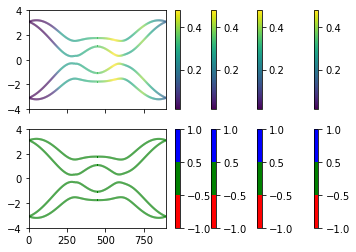

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
x = k
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
for j in range(4):
    y = E[j]
# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    

# Create a continuous norm to map from data points to colors
    norm = plt.Normalize(DOS_up.min(), DOS_up.max())
    lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
    lc.set_array(DOS_up)
    lc.set_linewidth(2)
    line = axs[0].add_collection(lc)
    fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
    cmap = ListedColormap(['r', 'g', 'b'])
    norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(DOS_up)
    lc.set_linewidth(2)
    line = axs[1].add_collection(lc)
    fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-4., 4.)
plt.show()

In [14]:
points = np.array([np.arange(10),np.arange(10)]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

(array([[[0, 0]],
 
        [[1, 1]],
 
        [[2, 2]],
 
        [[3, 3]],
 
        [[4, 4]],
 
        [[5, 5]],
 
        [[6, 6]],
 
        [[7, 7]],
 
        [[8, 8]]]), array([[[1, 1]],
 
        [[2, 2]],
 
        [[3, 3]],
 
        [[4, 4]],
 
        [[5, 5]],
 
        [[6, 6]],
 
        [[7, 7]],
 
        [[8, 8]],
 
        [[9, 9]]]))